## 타이타닉 생존자 예측
- https://www.kaggle.com/competitions/titanic
- titanic_train.csv 파일 사용


## [변수설명]
- PassengerId : 각 승객의 고유 번호
- Survived : 생존 여부(종속 변수) (0 = 사망 1 = 생존)
- Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
(1st = Upper, 2nd = Middle, 3rd = Lower)
- Name : 이름
- Sex : 성별
- Age : 나이
- SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
- Parch : 동반한 Parent(부모) Child(자식)의 수
- Ticket : 티켓의 고유넘버
- Fare : 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항
(C = Cherbourg, Q = Queenstown, S = Southampton)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/titanic_train.csv')

In [30]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [31]:
# 컬럼 타입 확인 info() 메서드
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


✔ RangeIndex : 891 총 891의 로우로 구성 그리고 컬럼 수는 12

✔ 2개의 컬럼이 float64, 5개 컬럼이 int64, 5개의 컬럼이 object

✔ Age, Cabin, Embarked 는 Null 값을 가지고 있다

🤔 문자열, Null 값이 있어서는 안되기 때문에 데이터 전처리를 해줘야함

### Null 값 처리
- Age는 평균 나이, 나머지 컬럼은 'N'값으로 변경

In [32]:
# fillna() 함수를 사용해 간단하게 Null 값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

# isnull() 함수는 null 값 여부 보여줌
print('데이터 세트 Null 값 개수 : ', titanic_df.isnull().sum())

데이터 세트 Null 값 개수 :  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 문자열 확인
- Sex, Cabin, Embarked

In [33]:
# 피처들의 값 분류를 먼저 살펴 보자
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64
cabin 값 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


✔ Sex, Embarked 값은 별문제 없으나 cabin의 경우 N이 687건으로 가장 많다. 속성값이 제대로 정리가 되지 않은 것 같다

✔ cabin에서 C23 C25 C27과 같이 여러 개가 한꺼번에 표기된것이 보임

✔ cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임

In [34]:
# cabin 앞 문자(알파벳)만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [35]:
# cabin 확인
print('cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())

cabin 값 분포 : 
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


### 데이터 탐색
- 예측을 수행하기 전 데이터 탐색
- 첫번째로 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별, 승객실등급, 나이

In [36]:
# 성별이 생존 확률에 어떤 영향을 미쳤는지 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

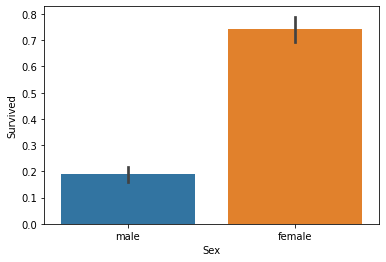

In [37]:
# 성별에 따른 생존자 수 시각화
sns.barplot(x='Sex',y='Survived',data=titanic_df)

✔ 여성 생존자 확률이 남성 보다 현저히 높은 것을 알 수 있다

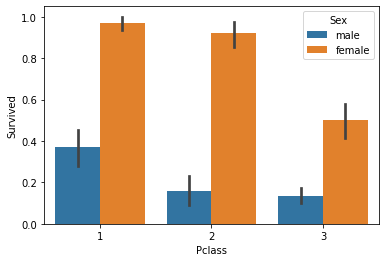

In [38]:
# 성별, 객실 등급에 따른 생존률 비교 시각화
# hue에 파라미터 추가
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

✔ 여성일 경우 1,2등급 차이는 별로 없으나 3등급실의 경우 생존 확률이 상대적으로 많이 떨어 졌다

✔ 남성의 경우는 1등급실 생존률이 2,3등급실 생존률 보다 월등히 높다

In [39]:
# Age에 따른 생존 여부 
# Baby=0~5, Child=6~12, Teenager=13~18, Student=19~25, 
# Young Adult=26~35, Adault=36~60, Elderly=60이상 으로 구분
# -1이하의 오류 값은 Unkown으로 분류

In [40]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정
def get_category(age):
  cat = ''
  if age <= -1: cat='Unknown'
  elif age <= 5: cat='Baby'
  elif age <= 12: cat='Child'
  elif age <= 18: cat='Teenager'
  elif age <= 25: cat='Student'
  elif age <= 35: cat='Young Adult'
  elif age <= 60: cat='Adult'
  else : cat = 'Elderly'

  return cat

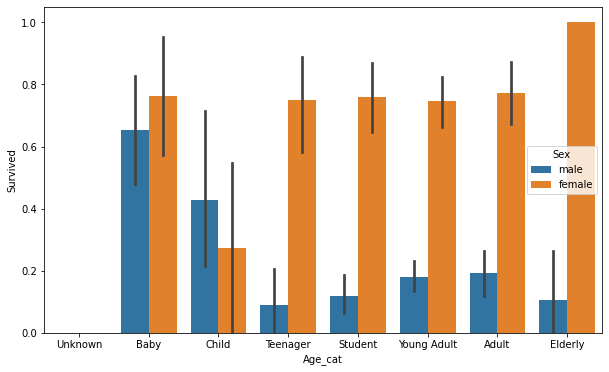

In [41]:
# 시각화 하기 위한 막대그래프 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# DataFrame의 apply labda 식에 사용
# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(x)는 입력값으로 'Age' 컬럼 값을 받아서 해당하는 cat 변환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat',y='Survived', hue='Sex', data=titanic_df, order=group_names)

# age 구분을 위해 만든 Age_cat을 나중을 위해 드롭
titanic_df.drop('Age_cat', axis=1, inplace=True)

✔ 여자 baby의 경우 비교적 생존률이 높았다

✔ 아쉽게도 여자 child의 경우 다른 연령대에 비해 생존 확률이 낮다

✔ 여자 Elderly의 경우는 생존률이 매우 높았다

❗ 이제까지 분석 한 결과 Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처임을 어느 정도 확인할 수 있었다

### 문자열 처리
- 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- LabelEncoder 사용
- LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0~(카테고리 유형수-1)까지의 숫자 값으로 변환

In [42]:
# encoder_features() 함수를 새로 생성해 변환
from sklearn import preprocessing

def encoder_features(dataDF):
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    dataDF[feature] = le.fit_transform(dataDF[feature])

  return dataDF

titanic_df = encoder_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


✔ Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것을 알 수 있다

### 피처를 가공한 내역을 정리, 함수 만들기
- 데이터의 전처리를 전체적으로 호출하는 함수는 transform_features()
- Null 처리, 포매팅, 인코딩을 수행하는 함수로 구성

In [46]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  from sklearn.preprocessing import LabelEncoder
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

#### 함수 적용해 다시 원본 데이터 가공
- 전처리를 수행하는 transform_features() 함수를 만들었으니 함수를 이용해 다시 원본 데이터를 가공
- 원본 csv 파일을 다시 로딩
- 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리(결정값)
- Survived 속성 드롭해 피처 데이터 세트 만들기
- 생성된 피처 데이터 세트에 transform_features() 적용 데이터 가공

In [47]:
# 원본 데이터 재로딩
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/titanic_train.csv')

In [48]:
# 피처 데이터 세트와 레이블 데이터 세트 추출
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

# 피처 데이터 세트 transform_features에 가공
X_titanic_df = transform_features(X_titanic_df)

#### 학습,테스트 데이터 분리

In [49]:
# 내려받은 학습 데이터 세트를 기반으로 train_test_split() API를 별도 의 테스트 데이터 세트를 추출
# 테스트 데이터 크기는 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

#### 결정트리, 램덤 포레스트, 로지스틱 회귀 예측
- 로지스틱 회귀는 이름은 회귀이지만 강력한 분류 알고리즘이다

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
from pandas.core.common import random_state
# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
from pandas.core.strings import accessor
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도:{accuracy_score(y_test,pred):.4f}')

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier 정확도:{accuracy_score(y_test,pred):.4f}')

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
print(f'LogisticRegression 정확도 :{accuracy_score(y_test,pred):.4f}')

DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도 :0.8492


✔ 3개의 알고리즘 중 RandomForestClassifier 정확도가 가장 높게 나왔다

✔ 하지만 아직 최적화 작업을 수행하지 않았고 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가 할 수 없다

✔ 교차 검증 결정 트리 모델을 평가 해야 겠다

#### 교차 검증
- KFold 교차검증
- cross_val_score()
- GridSearchCV 

##### KFold

In [59]:
# kFold 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores = []

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train,X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train,y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    # Classifier 학습/에측/정확도 계산
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    scores.append(accuracy)
    print(f'교차 검증 {iter_count} 정확도 :{accuracy:.4f}')
  
  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print(f'평균 정확도:{mean_score:.4f}')

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 :0.7542
교차 검증 1 정확도 :0.7809
교차 검증 2 정확도 :0.7865
교차 검증 3 정확도 :0.7697
교차 검증 4 정확도 :0.8202
평균 정확도:0.7823


✔ KFold 교차 검증 평균 정확도는 약 78.23%

##### cross_val_score()

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')

print(f'평균 정확도:{np.mean(scores):.4f}')

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도:0.7879


✔ StarifiedKFold를 이용해 세트를 분할 (분류니까)

✔ cross_val_score() 검증 평균 정확도는 약78.79%

##### GridSearchCV
- DecisionTreeClassifier의 최적 파라미터 찾고 예측 성능 측정
- max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능 측정

In [66]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[2,3,5,10],
          'min_samples_split':[2,3,5],
          'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print(f'GridSearchCV 최고 정확도 : {grid_dclf.best_score_ : .4f}')
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpred)
print(f'테스트 세트에서의 DecisionTreeClassifier 정확도 : {accuracy:.4f}')

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :  0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


✔ 최적의 하이퍼 파라미터 짱 DecisionTreeClassifier 정확도 약 87.15% 

## 정리
1. 데이터 가공 및 변환 과정의 전처리 작업 - 결손값처리(클랜징 작업), 레이블 인코딩이나 원-핫인코딩 같은 인코딩 작업, 스케일링/정규화 작업
2. 데이터를 학습/테스트 데이터 분리 데이터 세트 분리 작업
3. 학습 데이터 기반으로 ML 알고리즘을 적용해 모델 학습 - 교차 검증
4. 학습 된 모델 기반으로 테스트 데이터에 대한 예측 수행
5. 예측된 결과값으로 실제 결과값과 비교해 머신러닝 모델에 대한 평가 수행